<a href="https://colab.research.google.com/github/kmenzies28/ARCH4026_Practicals/blob/master/mesa_colab_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mesa

     |████████████████████████████████| 634kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Created wheel for mesa: filename=Mesa-0.8.6-cp36-none-any.whl size=646977 sha256=6361685d9d7809ebad6f74e16213bcedd4d0d718eedb3aa98a9e80923e519928
  Stored in directory: /root/.cache/pip/wheels/0b/e1/a9/8cb6a66246419d8268c559c551a6ea176481003d68168de011
Successfully built mesa


In [0]:
!pip install pipenv


     |████████████████████████████████| 5.2MB 2.8MB/s 
     |████████████████████████████████| 3.4MB 32.5MB/s 


In [0]:
import mesa
import numpy
import matplotlib


In [0]:
from mesa import Agent, Model

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)

In [0]:
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        pass

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [0]:
empty_model = MoneyModel(10)
empty_model.step()

In [0]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

In [0]:
model = MoneyModel(10)
for i in range(10):
    model.step()

(array([5., 0., 3., 0., 0., 0., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

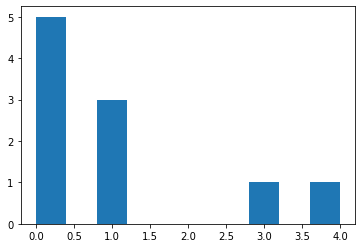

In [0]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

(array([428., 307., 163.,  60.,  26.,  16.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

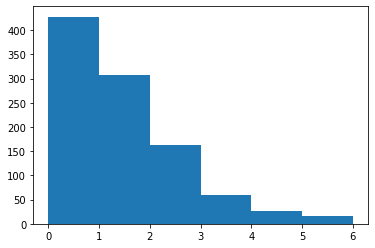

In [0]:
all_wealth = []
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth)+1))